# Microsoft Movie Studio
### Exploratory Data Analysis(EDA) for a movie recommendation.
### Objective:
** Microsoft wants to start a movie studio but doesnt know what type of movie to create

**we will analyze the movie data to find what type of movie earns the highest box office
revenue

...3 auctionable recommendations for microsoft

...visualisations that explain the findings

In [8]:
#import the necessary variables
import pandas as pd
import matplotlib as plt
import seaborn as sn

In [10]:
#uploading data
basics = pd.read_csv("/content/imdb.title.basics.csv.gz")
ratings = pd.read_csv("/content/imdb.title.ratings.csv.gz")
gross = pd.read_csv("/content/bom.movie_gross.csv.gz")
reviews = pd.read_csv("/content/rt.reviews.tsv.gz", sep='\t', encoding='latin-1')
budgets = pd.read_csv("/content/tn.movie_budgets.csv.gz")

basics.head(), ratings.head(), gross.head(), reviews.head(), budgets.head()

(      tconst                    primary_title              original_title  \
 0  tt0063540                        Sunghursh                   Sunghursh   
 1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
 2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
 3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
 4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   
 
    start_year  runtime_minutes                genres  
 0        2013            175.0    Action,Crime,Drama  
 1        2019            114.0       Biography,Drama  
 2        2018            122.0                 Drama  
 3        2018              NaN          Comedy,Drama  
 4        2017             80.0  Comedy,Drama,Fantasy  ,
        tconst  averagerating  numvotes
 0  tt10356526            8.3        31
 1  tt10384606            8.9       559
 2   tt1042974            6.4        20
 3   tt1043726            4.2    

In [11]:
#checking file info
basics.info()
print()
ratings.info()
print()
gross.info()
print()
reviews.info()
print()
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entri

Previewing the head of dataframes to know data we're working on

In [15]:
# Clean up the currency columns
for df in [budgets, gross]:
    for col in ['production_budget', 'domestic_gross', 'worldwide_gross', 'foreign_gross']:
        if col in df.columns:
            # Remove '$' and ',' and convert to numeric, coercing errors to NaN
            df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Display the info of the cleaned dataframes to verify the changes
budgets.info()
print()
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int6

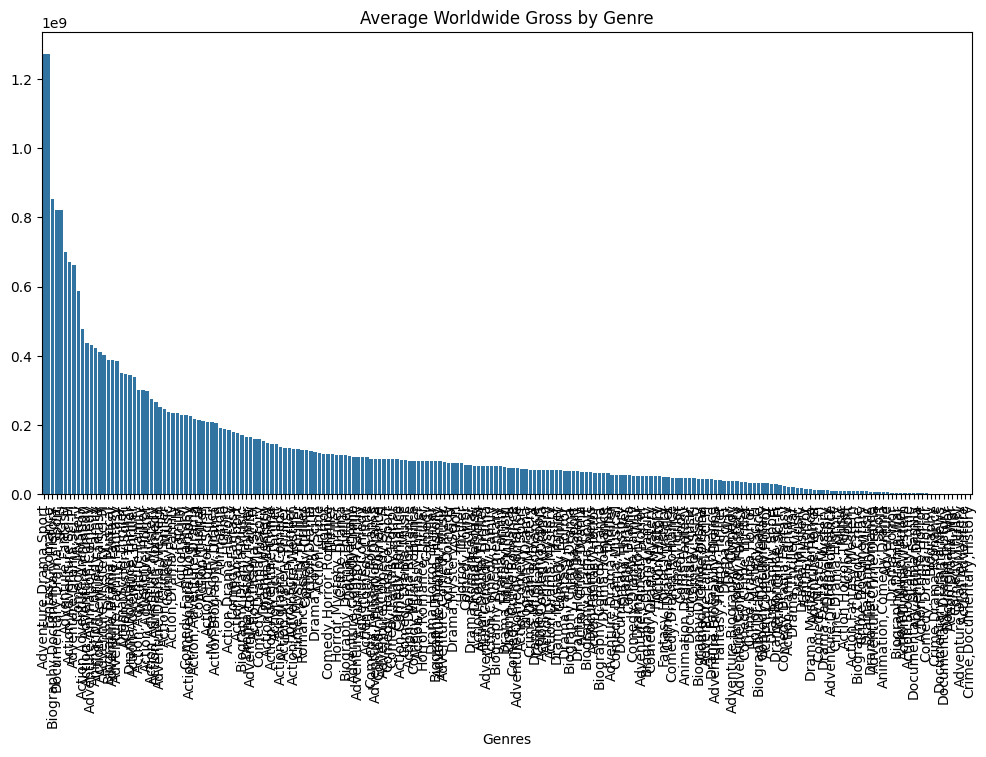

In [22]:
# Analysing the relationship between genres and the worldwide gross
genre_gross = movie_data.groupby('genres')['worldwide_gross'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_gross.index, y=genre_gross.values)
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.title('Average Worldwide Gross by Genre')
plt.show()

In [28]:
# Calculating the profits that the movie makes
movie_data['profit'] = movie_data['worldwide_gross'] - movie_data['production_budget']

# Analysing the relationship between genres and profit
genre_profit = movie_data.groupby('genres')['profit'].mean().sort_values(ascending=False)



/tmp/ipython-input-1512070951.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  s = movie_data['genres'].str.split(',').apply(pd.Series, 1).stack()


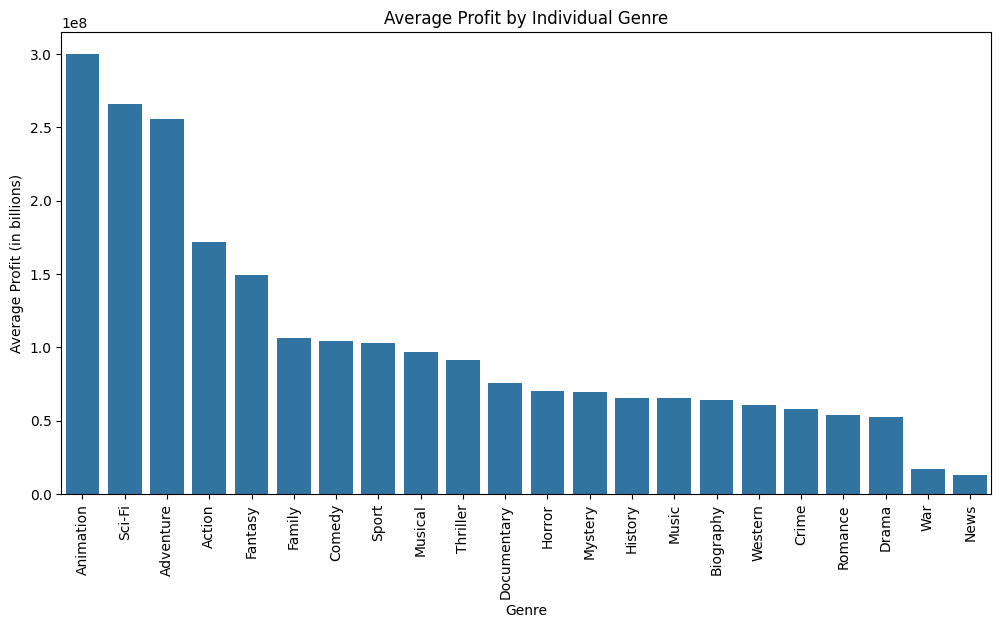

In [ ]:
# Create a new dataframe with one genre per row
s = movie_data['genres'].str.split(',').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genre'
movie_data_split = movie_data.join(s)

# Anal the relationship between individual genres and profit
genre_profit_split = movie_data_split.groupby('genre')['profit'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=genre_profit_split.index, y=genre_profit_split.values)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average Profit (in billions)')
plt.title('Average Profit by Individual Genre')
plt.show()